# 训练误差和泛化误差

- 训练误差（training error）：模型在训练数据集上计算得到的误差。 
- 泛化误差（generalization error）： 模型在新数据（testing dataset）上的误差。
- 主要关注泛化误差，不关注训练误差
- 如何计算训练误差和泛化误差？

# 验证数据集和测试数据集

- 验证数据集**validation**：一个用来评估模型好坏的数据集
    - 例如拿出50%的训练数据
    - 不要根训练数据混在一起（常犯错误）
- 测试数据集**test**：只用一次的数据集
    - 例如，未来的考试成绩
    - 房子的实际成交价
    
# K折交叉验证
- 在没有足够多的数据时使用（这是常态）
- 算法：
    - 将训练数据分割成K块
    - For i= 1, ... ,K
        - 使用第 i 块作为验证数据集，其余作为训练数据集
    - 返回K个验证集误差的平均
- 训练了k个模型之后，参数不同，然后在k种情况下k组参数都跑一遍，然后如果由一组参数是在k折中的平均表现最好，就用它
- 3种做法：
    - K折交叉验证就是用来确定超参数，确定好之后，再在整个训练集上训练一次
    - 不再重复训练，直接在K折交叉验证中，选取精度最好的模型拿出来。代价：训练数据少
    - 将K折交叉验证中的K个模型拿出来，测试集放到K个模型里，每个模型预测一次。然后把预测结果取均值。好处：voting，增加模型稳定度。代价：计算量K倍
- 常用：K=5或10
    - 例如：每次训练80%的数据，训练5次
|#|1|2|3|4|5|
| - | - | - | - | - | - |
|1|val|train|train|train|train|
|2|train|val|train|train|train|
|3|trainl|train|val|train|train|
|4|train|train|train|val|train|
|5|train|train|train|train|val|

# 总结
- 训练数据集：训练模型参数
- 验证数据集：选择模型超参数
- 非大数据集上通常使用K-折交叉验证
    - 通过K折，验证草超参数的好坏


# 2. 过拟合和欠拟合
- <img src="./pic/过拟合和欠拟合.PNG" width=300 height=300>
- 模型容量：
    - 模型的复杂度，越复杂的模型，可以学习更复杂的函数
    - 线性模型，比较简单
    - 多层感知机，比较复杂
||数据 简单|数据 复杂|
| - | - | - |
|模型容量 低|正常|欠拟合|
|模型容量 高|过拟合|正常|

## 模型容量

- 拟合各种函数的能力
- 低容量的模型难以拟合训练数据，**欠拟合**
- 高容量的模型可以记住所有的训练数据，**过拟合**

## 模型容量的影响
- 当模型容量低时，训练误差高。因为模型过于简单，无法拟合比较复杂的数据，所以泛化误差也高
- 随着模型容量增加，训练误差下降，可以到0，也就是拟合了所有数据（对数据的拟合能力）
- 但并不是拟合所有数据就是好的，过分的关注某些细节，可能被新的细节干扰，所以泛化误差会上升
<img src="./pic/模型容量的影响.PNG" width=300 height=300>
- 深度学习的核心：**在模型足够大的情况下，通过控制模型容量，使得泛化误差接近训练误差**


## 估计模型容量
- 难以在不同的种类算法之间比较
    - 例如树模型和神经网络
- 给定一个模型种类，将有2个主要因素
    - 参数的个数
    <img src="./pic/参数的个数.PNG" width=300 height=300>
    - 参数值的选择范围
    
    
# 3. VC维
- 统计学习理论的一个核心思想
- 对于一个分类模型，VC等于一个最大的数据集的大小，不管如何给定标号，都存在一个模型来对它进行完美分类

## 线性分类器的VC维
<img src="./pic/线性分类器的VC维.PNG" width=300 height=300>

## VC维的用处
- 提供为什么一个模型好的理论依据
    - 它可以衡量训练误差和泛化误差之间的间隔
- 但深度学习中很少使用
- 计算深度学习模型的VC维很困难


# 4. 数据复杂度
- 多个重要因素
     - 样本个数
     - 每个样本的元素个数（nn.Flatten()之后的features的个数，28x28）
     - 时间、空间结构（视频）
     - 多样性（1分类、10分类）

# 总结
- 模型容量需要匹配数据发咋读，否则可能导致欠拟合和过拟合
- 统计机器学习提供数学工具来衡量模型复杂度
- 实际中，一般靠观察训练误差和验证误差之间的区别

## 通过多项式拟合，来交互地探索【模型选择、欠拟合和过拟合】
<img src="./pic/多项式拟合.PNG" width=500 height=500>

In [1]:
import math
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

### 2. 生成数据集

In [2]:
max_degree = 20  # 多项式的最大阶数（生成特征为20的向量【shape（20，1）】）
n_train, n_test = 100, 100  # 训练和验证数据集大小
true_w = np.zeros(max_degree)  # 分配大量的空间
true_w[0:4] = np.array([5, 1.2, -3.4, 5.6])    # 后面的w_n都是0

features = np.random.normal(size=(n_train + n_test, 1))
np.random.shuffle(features)
poly_features = np.power(features, np.arange(max_degree).reshape(1, -1))
for i in range(max_degree):
    poly_features[:, i] /= math.gamma(i + 1)  # gamma(n)=(n-1)!
# labels的维度:(n_train+n_test,)
labels = np.dot(poly_features, true_w)
labels += np.random.normal(scale=0.1, size=labels.shape)

- 从生成的数据集中查看一下前2个样本， 第一个值是与偏置相对应的常量特征。

In [3]:
# NumPy ndarray转换为tensor
true_w, features, poly_features, labels = [torch.tensor(x, dtype=
    torch.float32) for x in [true_w, features, poly_features, labels]]

features[:2], poly_features[:2, :], labels[:2]

(tensor([[-1.3667],
         [-0.3628]]),
 tensor([[ 1.0000e+00, -1.3667e+00,  9.3397e-01, -4.2549e-01,  1.4538e-01,
          -3.9740e-02,  9.0522e-03, -1.7674e-03,  3.0195e-04, -4.5853e-05,
           6.2668e-06, -7.7864e-07,  8.8682e-08, -9.3234e-09,  9.1018e-10,
          -8.2931e-11,  7.0840e-12, -5.6952e-13,  4.3243e-14, -3.1106e-15],
         [ 1.0000e+00, -3.6275e-01,  6.5794e-02, -7.9556e-03,  7.2147e-04,
          -5.2343e-05,  3.1646e-06, -1.6399e-07,  7.4361e-09, -2.9972e-10,
           1.0872e-11, -3.5854e-13,  1.0838e-14, -3.0243e-16,  7.8362e-18,
          -1.8950e-19,  4.2964e-21, -9.1678e-23,  1.8476e-24, -3.5274e-26]]),
 tensor([-2.1342,  4.3989]))

### 对模型进行训练和测试
- 实现一个函数来评估模型在给定数据集上的损失

In [4]:
def evaluate_loss(net, data_iter, loss):  #@save
    """评估给定数据集上模型的损失"""
    metric = d2l.Accumulator(2)  # 损失的总和,样本数量
    for X, y in data_iter:
        out = net(X)
        y = y.reshape(out.shape)
        l = loss(out, y)
        metric.add(l.sum(), l.numel())
    return metric[0] / metric[1]

- 定义训练函数

In [5]:
def train(train_features, test_features, train_labels, test_labels,
          num_epochs=400):
    loss = nn.MSELoss(reduction='none')
    input_shape = train_features.shape[-1]
    # 不设置偏置，因为我们已经在多项式中实现了它
    net = nn.Sequential(nn.Linear(input_shape, 1, bias=False))
    batch_size = min(10, train_labels.shape[0])
    train_iter = d2l.load_array((train_features, train_labels.reshape(-1,1)),
                                batch_size)
    test_iter = d2l.load_array((test_features, test_labels.reshape(-1,1)),
                               batch_size, is_train=False)
    trainer = torch.optim.SGD(net.parameters(), lr=0.01)
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
                            xlim=[1, num_epochs], ylim=[1e-3, 1e2],
                            legend=['train', 'test'])
    for epoch in range(num_epochs):
        d2l.train_epoch_ch3(net, train_iter, loss, trainer)
        if epoch == 0 or (epoch + 1) % 20 == 0:
            animator.add(epoch + 1, (evaluate_loss(net, train_iter, loss),
                                     evaluate_loss(net, test_iter, loss)))
    print('weight:', net[0].weight.data.numpy())

### 三阶多项式函数拟合(正常)

weight: [[ 5.021721   1.3825427 -3.420852   5.0580745]]


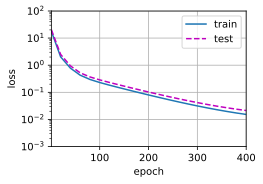

In [6]:
# 从多项式特征中选择前4个维度，即1,x,x^2/2!,x^3/3!
train(poly_features[:n_train, :4], poly_features[n_train:, :4],labels[:n_train], labels[n_train:])

### 线性函数拟合(欠拟合)

weight: [[3.465417  3.0550497]]


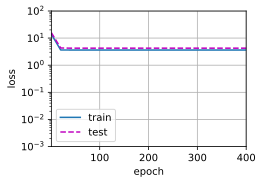

In [7]:
# 从多项式特征中选择前2个维度，即1和x
train(poly_features[:n_train, :2], poly_features[n_train:, :2],
      labels[:n_train], labels[n_train:])

### 高阶多项式函数拟合(过拟合)

weight: [[ 4.9918804   1.2372303  -3.2852712   5.363026   -0.55978096  1.0660796
   0.15284497  0.2987143   0.01584644  0.15807186  0.18854584 -0.21810456
  -0.04321029 -0.20328031  0.22021231 -0.12786838  0.02654639  0.2042259
  -0.09546572 -0.124832  ]]


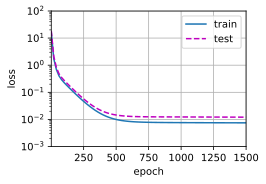

In [8]:
# 从多项式特征中选取所有维度
train(poly_features[:n_train, :], poly_features[n_train:, :],
      labels[:n_train], labels[n_train:], num_epochs=1500)

In [ ]:
# 通过神经网络，来描述计算机对样本的理解

# 沐神：世界上有三种东西，艺术（全凭主观，我觉得这样子好看），工程（做的东西可以通过实际来验证，有定理描述），科学（去理解为什么）
# 热力学在蒸汽机的发明之后100年才出现